## Importando bibliotecas e o arquivo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df=pd.read_csv('data/Discentes_2013-2019.csv',encoding='latin1')

/home/gustavo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
valores_invalidos=[]
for i in range(len(df)):
    try:
        int(df.CD_CONCEITO_PROGRAMA[i])
    except ValueError:
        valores_invalidos.append(i)
        
#tirando os valores
df=df.drop(valores_invalidos)

#transformando em int
df.CD_CONCEITO_PROGRAMA=df.CD_CONCEITO_PROGRAMA.astype('int64')

#ajeitando o index
df.index=range(0,len(df))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476029 entries, 0 to 2476028
Data columns (total 22 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   AN_BASE                         int64 
 1   NM_GRANDE_AREA_CONHECIMENTO     object
 2   CD_AREA_AVALIACAO               int64 
 3   NM_AREA_AVALIACAO               object
 4   CD_ENTIDADE_CAPES               int64 
 5   SG_ENTIDADE_ENSINO              object
 6   CS_STATUS_JURIDICO              object
 7   DS_DEPENDENCIA_ADMINISTRATIVA   object
 8   CD_PROGRAMA_IES                 object
 9   NM_REGIAO                       object
 10  SG_UF_PROGRAMA                  object
 11  NM_MUNICIPIO_PROGRAMA_IES       object
 12  CD_CONCEITO_PROGRAMA            int64 
 13  NM_PAIS_NACIONALIDADE_DISCENTE  object
 14  DS_TIPO_NACIONALIDADE_DISCENTE  object
 15  TP_SEXO_DISCENTE                object
 16  AN_NASCIMENTO_DISCENTE          int64 
 17  DS_GRAU_ACADEMICO_DISCENTE      object
 18  ST

## Agrupando por PPG

In [5]:
def contar_homem(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_mulher(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(0)
        else:
            L.append(1)
    return L

def contar_brasiliero(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_estrangeiro(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(0)
        else:
            L.append(1)
    return L

def media_especial(array):
    '''Tira a média dos valores do array ignorando-se os zeros.'''
    valores_nao_nulos=[]
    for i in array:
        if i!=0:
            valores_nao_nulos.append(i)
    return np.mean(valores_nao_nulos)

In [6]:
df['Homens']=contar_homem(df.TP_SEXO_DISCENTE)
df['Mulheres']=contar_mulher(df.TP_SEXO_DISCENTE)
df['Brasileiros']=contar_brasiliero(df.DS_TIPO_NACIONALIDADE_DISCENTE)
df['Estrangeiros']=contar_estrangeiro(df.DS_TIPO_NACIONALIDADE_DISCENTE)
df['Quantidade_Discentes']=[1 for i in range(len(df))]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476029 entries, 0 to 2476028
Data columns (total 27 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   AN_BASE                         int64 
 1   NM_GRANDE_AREA_CONHECIMENTO     object
 2   CD_AREA_AVALIACAO               int64 
 3   NM_AREA_AVALIACAO               object
 4   CD_ENTIDADE_CAPES               int64 
 5   SG_ENTIDADE_ENSINO              object
 6   CS_STATUS_JURIDICO              object
 7   DS_DEPENDENCIA_ADMINISTRATIVA   object
 8   CD_PROGRAMA_IES                 object
 9   NM_REGIAO                       object
 10  SG_UF_PROGRAMA                  object
 11  NM_MUNICIPIO_PROGRAMA_IES       object
 12  CD_CONCEITO_PROGRAMA            int64 
 13  NM_PAIS_NACIONALIDADE_DISCENTE  object
 14  DS_TIPO_NACIONALIDADE_DISCENTE  object
 15  TP_SEXO_DISCENTE                object
 16  AN_NASCIMENTO_DISCENTE          int64 
 17  DS_GRAU_ACADEMICO_DISCENTE      object
 18  ST

In [8]:
df1=df.groupby(['CD_PROGRAMA_IES','AN_BASE'],as_index=False).agg({'Homens':np.sum,'Mulheres':np.sum,
                                                              'Brasileiros':np.sum, 'Estrangeiros':np.sum,
                                                             'Quantidade_Discentes':np.sum,
                                                            'QT_MES_TITULACAO':media_especial,
                                                            'CD_AREA_AVALIACAO':np.max,'CS_STATUS_JURIDICO':np.max,
                                                            'AN_NASCIMENTO_DISCENTE':np.mean,'NM_REGIAO':np.max,
                                                            'SG_UF_PROGRAMA':np.max,
                                                            'CD_CONCEITO_PROGRAMA':np.max})


#esse aviso aparece porque tem uns programas que só tem valor zero a coluna QT_MES_TITULACAO
#(zero indica que o progama ainda não foi terminado )

/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
def proporcao_homens(df):
    L=[]
    for i in range(len(df)):
        L.append(df.Homens[i]/df.Quantidade_Discentes[i])
    return L

In [10]:
df1.insert(4,'Prop_Homens',proporcao_homens(df1),True)

In [11]:
df1.head(10)

,CD_PROGRAMA_IES,AN_BASE,Homens,Mulheres,Prop_Homens,Brasileiros,Estrangeiros,Quantidade_Discentes,QT_MES_TITULACAO,CD_AREA_AVALIACAO,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA
0,10001018002P1,2013,29,48,0.376623,77,0,77,40.761905,9,FEDERAL,1981.000000,NORTE,RO,3
1,10001018002P1,2014,26,43,0.376812,68,1,69,31.461538,9,FEDERAL,1983.275362,NORTE,RO,3
2,10001018002P1,2015,33,57,0.366667,88,2,90,29.200000,9,FEDERAL,1984.311111,NORTE,RO,3
3,10001018002P1,2016,28,53,0.345679,80,1,81,30.166667,9,FEDERAL,1986.493827,NORTE,RO,3
4,10001018002P1,2017,43,64,0.401869,106,1,107,28.428571,9,FEDERAL,1987.579439,NORTE,RO,4
5,10001018002P1,2018,37,54,0.406593,89,2,91,37.733333,9,FEDERAL,1988.527473,NORTE,RO,4
6,10001018002P1,2019,30,48,0.384615,77,1,78,29.103448,9,FEDERAL,1989.371795,NORTE,RO,4
7,10001018004P4,2013,24,48,0.333333,72,0,72,29.800000,45,FEDERAL,1981.500000,NORTE,RO,4
8,10001018004P4,2014,20,42,0.322581,62,0,62,27.500000,45,FEDERAL,1981.048387,NORTE,RO,4
9,10001018004P4,2015,24,48,0.333333,72,0,72,25.222222,45,FEDERAL,1981.583333,NORTE,RO,4


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28465 entries, 0 to 28464
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CD_PROGRAMA_IES         28465 non-null  object 
 1   AN_BASE                 28465 non-null  int64  
 2   Homens                  28465 non-null  int64  
 3   Mulheres                28465 non-null  int64  
 4   Prop_Homens             28465 non-null  float64
 5   Brasileiros             28465 non-null  int64  
 6   Estrangeiros            28465 non-null  int64  
 7   Quantidade_Discentes    28465 non-null  int64  
 8   QT_MES_TITULACAO        26134 non-null  float64
 9   CD_AREA_AVALIACAO       28465 non-null  int64  
 10  CS_STATUS_JURIDICO      28465 non-null  object 
 11  AN_NASCIMENTO_DISCENTE  28465 non-null  float64
 12  NM_REGIAO               28465 non-null  object 
 13  SG_UF_PROGRAMA          28465 non-null  object 
 14  CD_CONCEITO_PROGRAMA    28465 non-null

## Tentando um ML

In [13]:
#coisas para fazer o SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

#coisas para testar
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [14]:
df1=df1.dropna()

In [15]:
# separando em treino e teste

x=df1.iloc[:,6:9] #hm, só três features
y=df1.iloc[:,14]

x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,random_state=0,test_size=0.2)

In [16]:
#fazendo tudo em escala 
scaler = StandardScaler().fit(x_treino)
x_treino=scaler.transform(x_treino)
x_teste=scaler.transform(x_teste)

In [17]:
#treinando a máquina 
clf=svm.SVC()
clf.fit(x_treino,y_treino)

#testando o modelo

y_pred=clf.predict(x_teste)
print('Score F1 =',f1_score(y_teste,y_pred,average='weighted'))
print('Acurácia =',accuracy_score(y_teste,y_pred))

Score F1 = 0.4882157690592258
Acurácia = 0.5159747465085135


Text(0.5, 1.0, 'Confusion Matrix normalizada para os valores previstos')

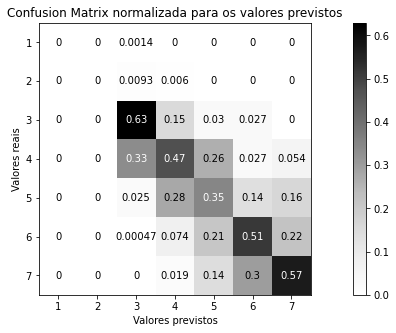

In [18]:
plot_confusion_matrix(clf,x_teste,y_teste,values_format='.2g',normalize='pred',cmap='Greys')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('Confusion Matrix normalizada para os valores previstos')